In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc
import scipy.integrate as sci

\\\ Here we try to simulate the solution for the 2nd moments <x^2> of a probability function P(x) ~ e^(-F(x)/s^2)

\\\ F(x) is the Integral fo f(x)=ax + bx^2 + cx^3 and fits into dx=f(x)dt + s*dW where sigma is s


In [2]:
def moments(a,b,c,sigma,x0,xn):
    def integrand1(x,a,b,c,sigma):
        return x**2*np.exp(-(1/2*a*x**2+1/3*b*x**3+c*1/4*x**4)/(sigma**2))
    def integrand2(x,a,b,c,sigma):
        return np.exp(-(1/2*a*x**2+1/3*b*x**3+c*1/4*x**4)/(sigma**2))
    mean,error=sci.quad(integrand1,x0, xn,args=(a,b,c,sigma))
    norm,error1=sci.quad(integrand2,x0, xn,args=(a,b,c,sigma))
    if norm != 0:
        moment=mean/norm
    else:
        moment = 0
    return moment

In [3]:
def DiffPlot(a,b,c,x0,xn):
    sigmanum = 800
    sigma=np.linspace(-4,4,sigmanum)
    sigma=10**sigma
    
    m=np.zeros(sigmanum)
    for j in range(0,sigmanum):
        m[j]=moments(a,b,c,sigma[j],x0,xn)
    
    #extract where it becomes 0 due to numerical precision
    SNR=np.sqrt(m/(sigma**2))
    a=np.count_nonzero(SNR==0)
    m_withoutzero=m[a:-1]
    sigmawithoutzero=sigma[a:-1]
    SNR_new=SNR[a:-1]
    
    return sigmawithoutzero,m_withoutzero,SNR_new



In [4]:
def plot(sigmawithoutzero,m_withoutzero,SNR_new,a):
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(13,10))
    #plt.subplots_adjust( bottom=0.18, top=0.95, left=0.15)
    ax1.plot(sigmawithoutzero,m_withoutzero)
    ax2.plot(sigmawithoutzero,SNR_new)
    plt.xlabel("$log(\sigma)$")
    plt.xscale('log')
    ax1.set_ylabel("$<x^2>$")
    ax2.set_ylabel("$log(SNR)$")
    ax2.set_yscale('log')
    ax1.set_title('Second Moment of a {} differential equation'.format(a), fontdict={'fontsize': 12, 'fontweight': 'medium'})
    ax2.set_title('Signal to noise ratio SNR of a {} differential equation'.format(a), fontdict={'fontsize': 12, 'fontweight': 'medium'})
    #plt.show()
    fig.savefig('/home/beate/LocalGitHubNetworkKolleg/NoisyNetworkReconstruction_SDDV/plotting/1DDiffEq/MomentAndSNR_VS_Noisefor{}.svg'.format(a))
    
    return

/home/beate/anaconda3/envs/env_full/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
/home/beate/anaconda3/envs/env_full/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  


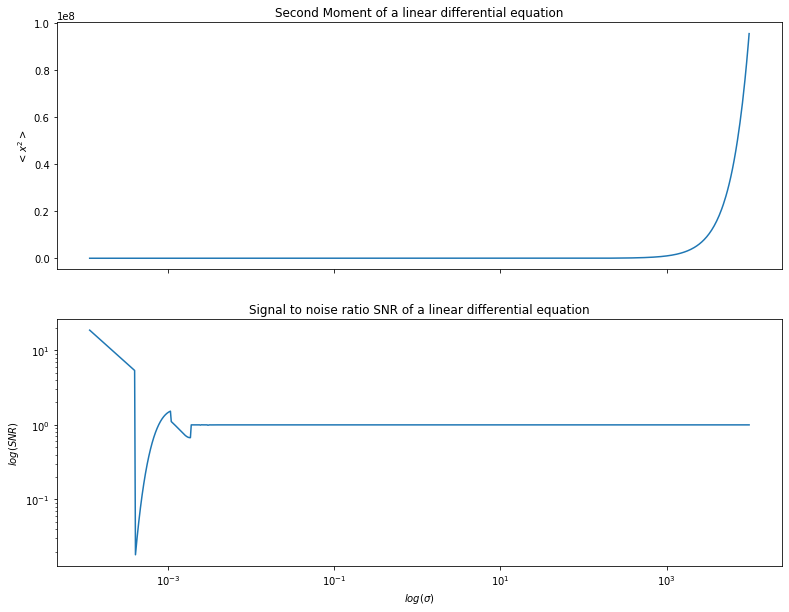

In [5]:
sigmawithoutzero,m_withoutzero,SNR_new=DiffPlot(1,0,0,-np.inf,np.inf)
plot(sigmawithoutzero,m_withoutzero,SNR_new,'linear')

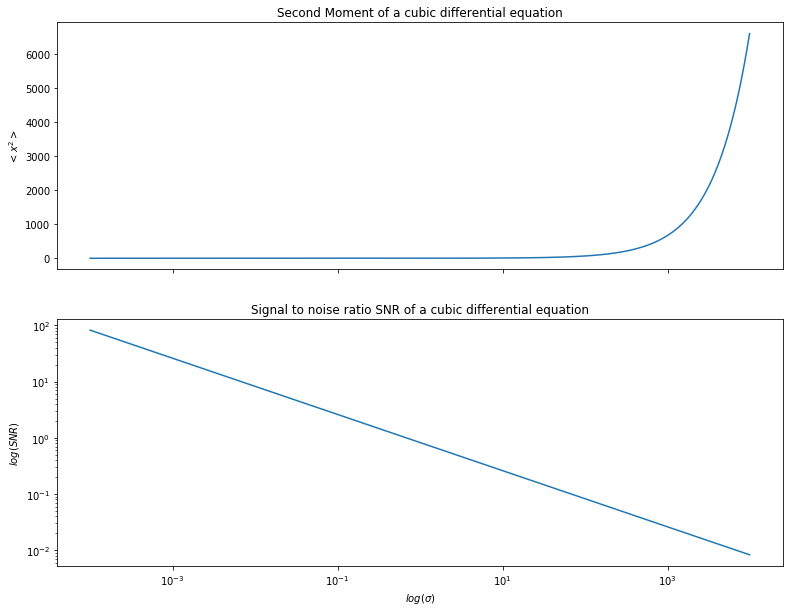

In [6]:
sigmawithoutzero,m_withoutzero,SNR_new=DiffPlot(0,0,1,-np.inf,np.inf)
plot(sigmawithoutzero,m_withoutzero,SNR_new,'cubic')

/home/beate/anaconda3/envs/env_full/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


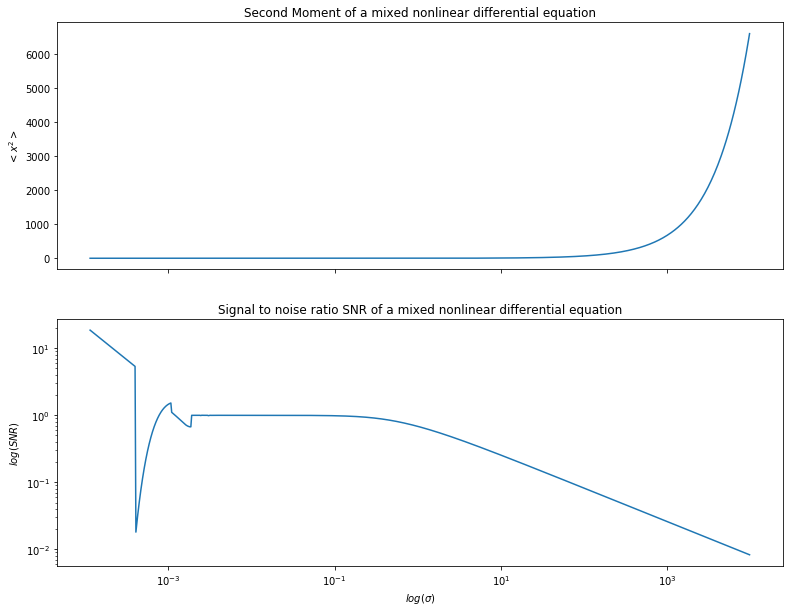

In [7]:
sigmawithoutzero,m_withoutzero,SNR_new=DiffPlot(1,0,1,-np.inf,np.inf)
plot(sigmawithoutzero,m_withoutzero,SNR_new,'mixed nonlinear')

/home/beate/anaconda3/envs/env_full/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
/home/beate/anaconda3/envs/env_full/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


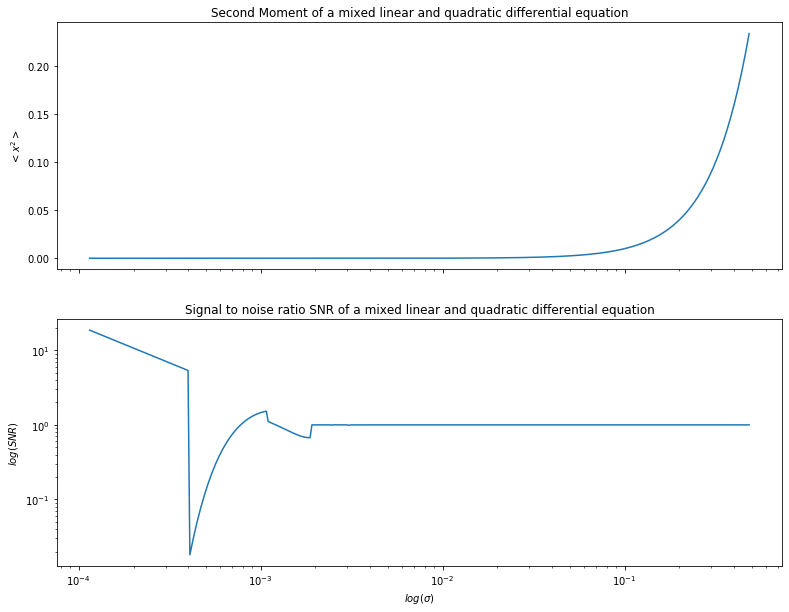

In [8]:
sigmawithoutzero,m_withoutzero,SNR_new=DiffPlot(1,0.001,0,-np.inf,np.inf)
plot(sigmawithoutzero,m_withoutzero,SNR_new,'mixed linear and quadratic')
#only possible for b very small

/home/beate/anaconda3/envs/env_full/lib/python3.7/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


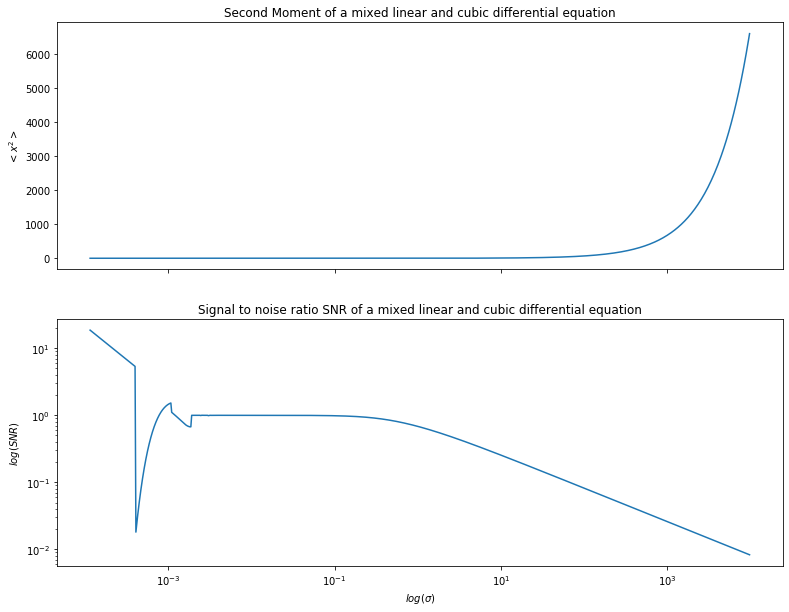

In [9]:
sigmawithoutzero,m_withoutzero,SNR_new=DiffPlot(1,0,1,-np.inf,np.inf)
plot(sigmawithoutzero,m_withoutzero,SNR_new,'mixed linear and cubic')
